In [3]:
# import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Detect if probability shifts for attribute data (using Chi Square)
Use Chi Square test to compare number of 'a' in current vs. reference windows.
Tunable Parameters:
 a : Significant level (0.05 or 0.01) to reject the null hypothesis that current = reference
 w_size : Window size
 

In [8]:
#### Function to get detect concept change for attributes data
#### Assign char a,b,c to value 0,1,2 seperately for all data points first
## posTriple2_160,posTriple_175, posTripleDouble_175, negTriple,negWithRare,negBinary

# function to calculate probability from a data list
def findP(list):
    n = len(list)
    p_a = list.count(0) / n
    p_b = list.count(1) / n
    p_c = list.count(0) / n
    return p_a, p_b, p_c

# function to calculate probability from list with specific window size
def findP_window_size(list, pos, window_size):
    return findP(list[pos - window_size: pos])

## function to detect change using Chi-Square. Specify window size and alpha
def detectChiSq(filename, num_choice=2, w_size=40, a=0.01):

    with open(filename) as f: # Open file as f
        lines = f.read().splitlines()  # Split file line by line and put lines in to var "lines"
    f.close() # Close file
    print('')
    print('Detecting Change in ' + filename)

    data = [] # Initiate an array "data" to hold original attributes data 
    for x in lines:
        if x == 'a':    # Convert char a to number 0 and append to data array
            data.append(0) 
        if x == 'b':    # Convert char b to number 1 and append to data array
            data.append(1)
        if x == 'c':    # Convert char c to number 2 and append to data array
            data.append(2)     

    # find probabilities of a, b, c
    prob = []
    x_axis = []
    for i in range(len(data)):
        if i >= w_size:
            p = findP_window_size(data, i, w_size)
            prob.append(p[0])
            x_axis.append(i)

    # plot probabilities        
    with plt.style.context('bmh'):
        plt.plot(x_axis, prob)
        plt.title("Probability of a")
    plt.show()

    # loop to detect change
    for i in range(len(data)):
        if i - w_size >= w_size:
            W0 = data[i - (w_size * 2):i - w_size] # set reference window
            W1 = data[i - w_size: i] # set current window from current location minus w_size

            # find expected and observed value of a, b, c
            if num_choice == 2:
                expected = [W0.count(0), W0.count(1)]
                observed = [W1.count(0), W1.count(1)]
            if num_choice == 3:
                expected = [W0.count(0), W0.count(1), W0.count(2)]
                observed = [W1.count(0), W1.count(1), W0.count(2)]

            # find chi square
            chi = stats.chisquare(f_obs=observed, f_exp=expected)
            p = chi[1]

            # reject H0 and conclude that there is a change at n
            if p < a:
                return("Change detected at " + str(i) + " with p-value = " + str(p))
        else:
            pass
    return("No change")


Detecting Change in posBinary_150.txt


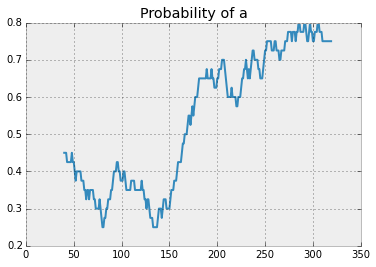

Change detected at 170 with p-value = 9.81265304338e-05

Detecting Change in negBinary.txt


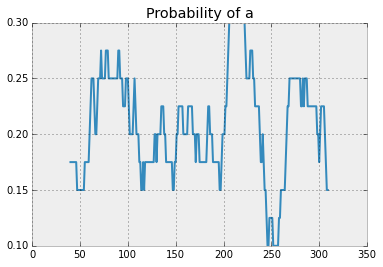

No change

Detecting Change in negWithRare.txt


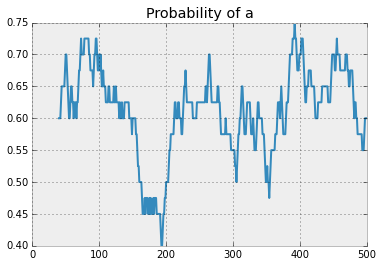

Change detected at 305 with p-value = 0.000456438674116

Detecting Change in posTriple2_160.txt


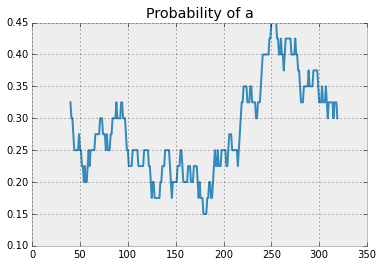

Change detected at 183 with p-value = 0.000294033108854

Detecting Change in posTriple_175.txt


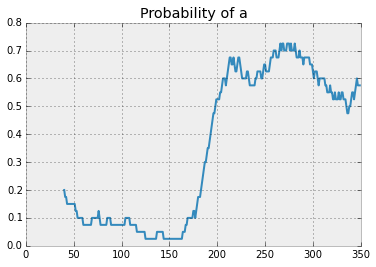

Change detected at 175 with p-value = 0.00031573539252

Detecting Change in posTripleDouble_175.txt


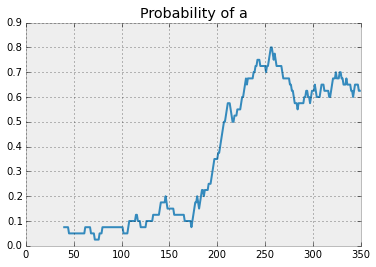

Change detected at 115 with p-value = 0.000296044730057

Detecting Change in negTriple.txt


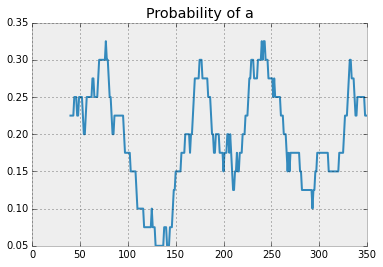

Change detected at 111 with p-value = 0.000771891419099


In [12]:
# read data and detect change
print(detectChiSq('posBinary_150.txt', num_choice=2, w_size=40, a=0.001))
print(detectChiSq('negBinary.txt', num_choice=2, w_size=40, a=0.001))
print(detectChiSq('negWithRare.txt', num_choice=2, w_size=40, a=0.001))
print(detectChiSq('posTriple2_160.txt', num_choice=3, w_size=40, a=0.001))
print(detectChiSq('posTriple_175.txt', num_choice=3, w_size=40, a=0.001))
print(detectChiSq('posTripleDouble_175.txt', num_choice=3, w_size=40, a=0.001))
print(detectChiSq('negTriple.txt', num_choice=3, w_size=40, a=0.001))